# EICU data from the Dungog East Coast Low

This notebook imports and explores the cleaned up data from the EICU for the Dungug East Coast Low event. The data have been cleaned to remove empty fields, and an error in the lat/lon values for Medowie (where the lat and lon values were swapped). 

The working directory for this project is: 

*\\nas\gemd\georisk\HaRIA_B_Wind\projects\impact_forecasting\data\exposure\NSW\April_2015_Impact_Assessment*

**Date: August 2017, Creator: Claire Krause**

The data have been combined with outputs from the BoM's high resolution Dungog East Coast Low model ensemble. The netcdf outputs from the model were converted to Geotiffs using gdal_translate 

`e.g. gdal_translate -of GTiff NETCDF:combined_alltimes_accum_ls_rainrate_stage4_ens00.nc:lsrain combined_alltimes_accum_ls_rainrate_stage4_ens00.tif`

The Geotiffs were then read into ArcGIS, along side the EICU data. The model raster value at each EICU location was determined using the following code:

`import arcpy
from arcpy.sa import *
arcpy.CheckOutExtension('Spatial')
ExtractValuesToPoints("<observation_points>", "<TCRMwindfield>.tif", "<outputlayername>", "NONE", "VALUE_ONLY")`

The raster values were exported to a .txt file, and added to the final columns of the EICU data.

# Set up the notebook

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_context("poster")

# Start by reading in an exploring the dataset

In [2]:
filename = "//nas/gemd/georisk/HaRIA_B_Wind/projects/impact_forecasting/data/exposure/NSW/April_2015_Impact_Assessment/Property_Damage_cleaned.csv"
df = pd.read_csv(filename)
df

,OBJECTID,createdate,GlobalID,srcglobali,papoid,srcid,assessoff,teamid,dateinsp,agency,...,validaddre,EICU_Degdamage,EICU_Deg_1,Comments,combined_alltimes_maxwind_stage4_ens12,combined_alltimes_maxwind_stage4_ens22,combined_alltimes_accum_ls_rainrate_stage4_ens00,combined_alltimes_accum_ls_rainrate_stage4_ens03,combined_alltimes_accum_ls_rainrate_stage4_ensMEAN,combined_alltimes_accum_ls_rainrate_stage4_ensSTD
0,1,2/05/2015 0:00,{D931AB3C-853B-479C-BEE8-E9FDE348B32B},{5B02180D-2F74-41EC-B359-05279C1C51C6},104515994,FRNSW2015521449.14,David Wrightson,NSWTF1,2/05/2015 0:00,FRNSW,...,TRUE,Major Impact - 26-50%,Degree of Damage,,23.138424,24.279449,0.002584,0.005728,0.005537,0.002793
1,2,2/05/2015 0:00,{D61183A7-6BD7-42C6-8DB4-69854968ACC8},{AA3F5420-8C2A-4184-BFFD-4625F14A5819},100722868,FRRA2015521549.54,Ray Irving,NSWTF1,2/05/2015 0:00,FRNSW,...,TRUE,No Damage - 0%,Degree of Damage,,22.091549,22.630648,0.007365,0.005379,0.006804,0.005993
2,3,2/05/2015 0:00,{92B48886-B1FC-43E3-8E5A-9C8B8A1E7930},{EB820BF0-547F-4C0D-920A-51B17BFDCC97},100720452,FRRA2015521631.18,Ray Irving,NSWTF1,2/05/2015 0:00,FRNSW,...,TRUE,No Damage - 0%,Degree of Damage,,23.154724,23.689598,0.002526,0.005667,0.006671,0.006047
3,4,3/05/2015 0:00,{B284718E-479B-4140-8BF9-6DFDE0EB67CA},{3D0F69CA-818A-4A3A-B9A8-35804BCAA564},100719153,FRNSW201553122.3,Paul Hughes,NSWTF1,3/05/2015 0:00,FRNSW,...,TRUE,No Damage - 0%,Degree of Damage,,23.407719,24.402386,0.002564,0.005387,0.006720,0.006189
4,5,3/05/2015 0:00,{A45B267E-CD94-409F-8C22-0A6B3E4EE5FE},{D996B18A-89DC-4ED7-BFFD-DA9EDD02DC5B},100832775,FRNSW2015531214.12,Keith Sanchez,NSWTF1,3/05/2015 0:00,FRNSW,...,TRUE,No Damage - 0%,Degree of Damage,,8.712126,8.987328,0.002729,0.008917,0.007808,0.006148
5,6,3/05/2015 0:00,{DB43F4E9-1E6F-432C-A1D9-C23FF2603F48},{04CA95AD-FC49-4C98-B80E-20A91A5C1F17},100799970,FRRA2015531159.8,Ray Irving,NSWTF1,3/05/2015 0:00,FRNSW,...,TRUE,No Damage - 0%,Degree of Damage,,13.433301,13.784731,0.002154,0.008389,0.006922,0.004770
6,7,3/05/2015 0:00,{15E0A846-4A7C-4254-8F5E-1B501677E5C7},{505AF506-620C-4D2B-B03C-F5730233E55E},100796683,FRRA2015531211.14,Ray Irving,NSWTF1,3/05/2015 0:00,FRNSW,...,TRUE,No Damage - 0%,Degree of Damage,,17.220442,17.598497,0.002207,0.008205,0.006324,0.004138
7,8,3/05/2015 0:00,{C75BED75-A0D4-43AC-B304-E2F2DF53FFC5},{7020C1B8-D4E8-4882-B3F0-F51DB52633E8},100800277,FRRA2015531212.22,Ray Irving,NSWTF1,3/05/2015 0:00,FRNSW,...,TRUE,No Damage - 0%,Degree of Damage,,17.220442,17.598497,0.002207,0.008205,0.006324,0.004138
8,9,3/05/2015 0:00,{10FD2ACD-46E7-4AD4-B35A-3C0CA7122ED6},{A347EA67-60FE-4A00-9A79-55AEB9EE9430},100732652,FRNSW2015531243.57,Deryck Salfus,NSWTF1,3/05/2015 0:00,FRNSW,...,TRUE,Destroyed - 76-100%,Degree of Damage,,18.811729,18.187853,0.005391,0.007359,0.007682,0.005569
9,10,3/05/2015 0:00,{E0A2E707-2027-4329-A099-2DE1E9D72ED7},{FA8F8848-D668-4FB3-98F5-B3379DB6C359},100791165,FRNSW2015531433.34,Duncan Armour,NSWTF1,3/05/2015 0:00,FRNSW,...,TRUE,No Damage - 0%,Degree of Damage,,24.190077,24.971281,0.002938,0.005517,0.006715,0.006388


### List of column headings

In [3]:
df.columns

Index([u'OBJECTID', u'createdate', u'GlobalID', u'srcglobali', u'papoid',
       u'srcid', u'assessoff', u'teamid', u'dateinsp', u'agency', u'eventname',
       u'eventtype', u'areainspd', u'position_', u'number_', u'street',
       u'streettype', u'suburb', u'state_', u'postcode', u'country',
       u'longaddrss', u'gurasaddrs', u'latitude', u'longitude', u'propinsurd',
       u'continsurd', u'buildnguse', u'foundation', u'structure_', u'roof',
       u'floorlngth', u'floorlng_1', u'floorwidth', u'numbsement', u'numaprt',
       u'numaprthab', u'asbestos', u'pwrwiredwn', u'dangertree', u'othdebris',
       u'Field42', u'propstatus', u'degdamage', u'roofdam', u'frmecollap',
       u'bldleaning', u'rackingdam', u'grndmovemt', u'Field50', u'waterinund',
       u'maxwatrlev', u'washoutreq', u'validaddre', u'EICU_Degdamage',
       u'EICU_Deg_1', u'Comments', u'combined_alltimes_maxwind_stage4_ens12',
       u'combined_alltimes_maxwind_stage4_ens22',
       u'combined_alltimes_accum_ls_rai

# Just do some quick cleaning up of the data

There are a number of blank fields throughout the data where a value was not entered into the dataset by the assessor. We need to keep track of the missing data, as well as the entered data, so we will find all 'NaN' values in the dataset, and change these to 'Not given' so we can include them in subsequent analyses. 

In [30]:
df = df.fillna('Not given')

### How many entries do we have for each column?
I.e. not NaN. Note that this does not check the contents of the field, only that something was written into it

NB: Something isn't quite working here. Use the values listed in the text below, not the outputs from this cell

In [5]:
df.count()

OBJECTID                                              2071
createdate                                            2071
GlobalID                                              2071
srcglobali                                            2071
papoid                                                2071
srcid                                                 2071
assessoff                                             2071
teamid                                                2071
dateinsp                                              2071
agency                                                2071
eventname                                             2071
eventtype                                             2071
areainspd                                             2071
position_                                             2071
number_                                               2071
street                                                2071
streettype                                            20

# EICU data for the Hunter Region ECL event:

* Number of data entries = 2072
* Lat/lon = 2062 (99.5%)
* EICU_Degdamage - damage state rank = 2055 (99.2%)
* Insurance state = 1821 (88%)
* Building use = 1909 (92%)
* Foundations / Structure / Roof type = 1821 (88%)
* Water inundation = 1317 (64%)
* Water level = 203 (10%)

# Lets explore some key fields in more detail...

In [13]:
damage = df.groupby('EICU_Degdamage').count()
damage.OBJECTID

EICU_Degdamage
                            17
Destroyed - 76-100%         14
Major Impact - 26-50%      147
Minor Impact - 1-25%       375
No Damage - 0%            1465
Severe Impact - 51-75%      53
Name: OBJECTID, dtype: int64

## Damage and water?

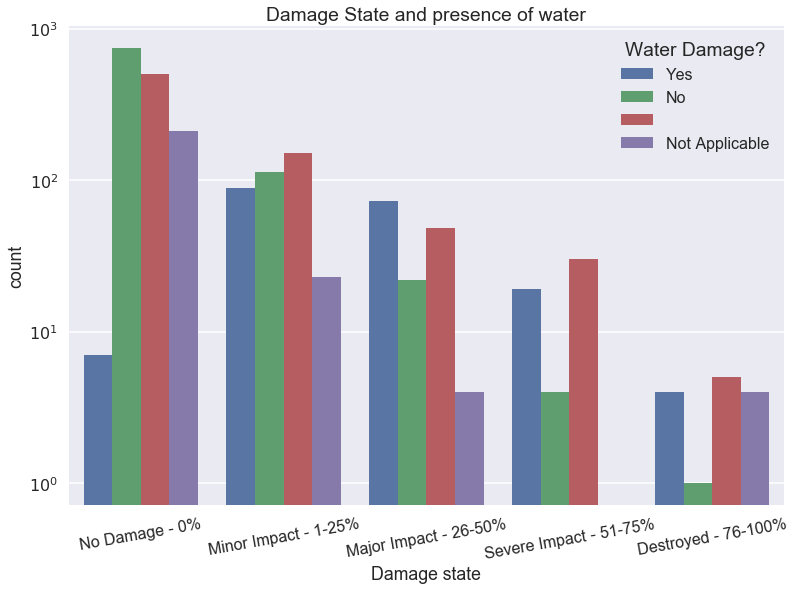

In [14]:
order = ['No Damage - 0%', 'Minor Impact - 1-25%', 'Major Impact - 26-50%', 'Severe Impact - 51-75%', 'Destroyed - 76-100%']
ax = sns.countplot(x="EICU_Degdamage", hue="waterinund", data=df, order=order)
ax.legend(title="Water Damage?", loc=1)
ax.set_yscale("log", nonposy='clip')
plt.xticks(rotation=10)
plt.title('Damage State and presence of water')
plt.xlabel('Damage state')

There does seem to be some relationship between the presence of water and damage state. Note that the last two columns represent missing vales, and where the surveyor has selected 'not applicable'.

## Damage by roof type

In [19]:
temp = []
for name, group in df.groupby('EICU_Degdamage'):
    numingroup = group['OBJECTID'].count()
    numroofs = group.groupby('roof').count()
    percroofs = numroofs['OBJECTID']/numingroup*100
    for keys in percroofs.keys():
        temp.append((name, keys, percroofs[keys]))

roofdamage = pd.DataFrame(temp, columns = ['Damage_state', 'Roof_type', 'Percent'])
roofdamage

,Damage_state,Roof_type,Percent
0,,,100.000000
1,Destroyed - 76-100%,,21.428571
2,Destroyed - 76-100%,Metal Sheeting,42.857143
3,Destroyed - 76-100%,Not Applicable,7.142857
4,Destroyed - 76-100%,Tile,28.571429
5,Major Impact - 26-50%,,27.891156
6,Major Impact - 26-50%,Fibre Sheeting,0.680272
7,Major Impact - 26-50%,Metal Sheeting,38.095238
8,Major Impact - 26-50%,Not Applicable,2.721088
9,Major Impact - 26-50%,Tile,30.612245


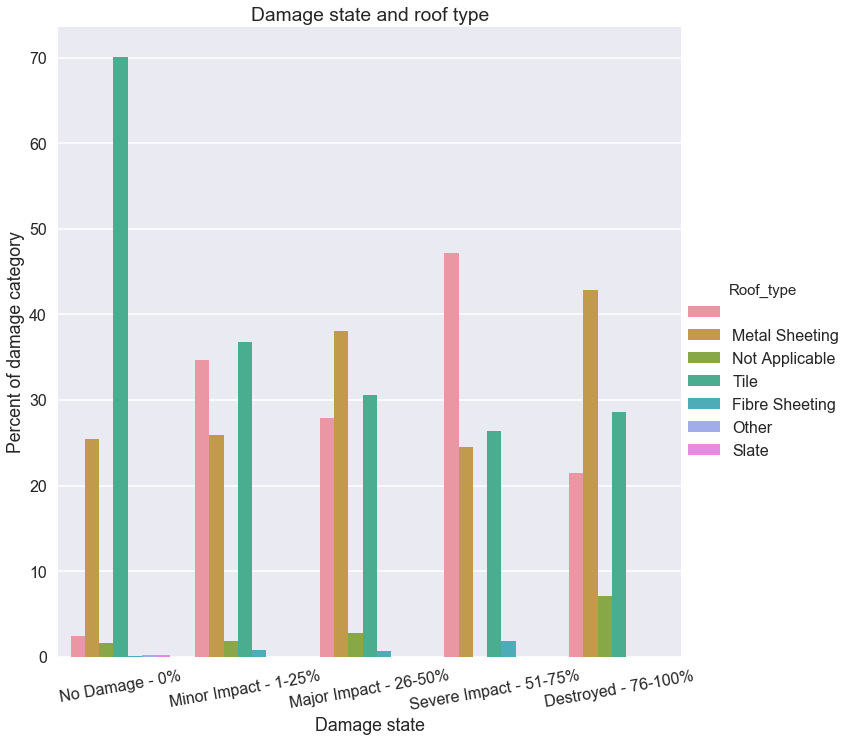

In [20]:
order = ['No Damage - 0%', 'Minor Impact - 1-25%', 'Major Impact - 26-50%', 'Severe Impact - 51-75%', 'Destroyed - 76-100%']
ax = sns.factorplot(x="Damage_state", y = 'Percent', hue="Roof_type", data=roofdamage, order=order, kind = 'bar', size = 10)
plt.xticks(rotation=10)
plt.title('Damage state and roof type')
plt.ylabel('Percent of damage category')
plt.xlabel('Damage state')

## Damage by wall structure type

In [21]:
temp = []
for name, group in df.groupby('EICU_Degdamage'):
    numingroup = group['OBJECTID'].count()
    numroofs = group.groupby('structure_').count()
    percroofs = numroofs['OBJECTID']/numingroup*100
    for keys in percroofs.keys():
        temp.append((name, keys, percroofs[keys]))

structuredamage = pd.DataFrame(temp, columns = ['Damage_state', 'Structure_type', 'Percent'])
structuredamage

,Damage_state,Structure_type,Percent
0,,,100.000000
1,Destroyed - 76-100%,,21.428571
2,Destroyed - 76-100%,Brick Veneer,35.714286
3,Destroyed - 76-100%,Not applicable,14.285714
4,Destroyed - 76-100%,Steel Frame,7.142857
5,Destroyed - 76-100%,Timber Frame,21.428571
6,Major Impact - 26-50%,,27.891156
7,Major Impact - 26-50%,Brick Veneer,27.210884
8,Major Impact - 26-50%,Not applicable,2.040816
9,Major Impact - 26-50%,Other,3.401361


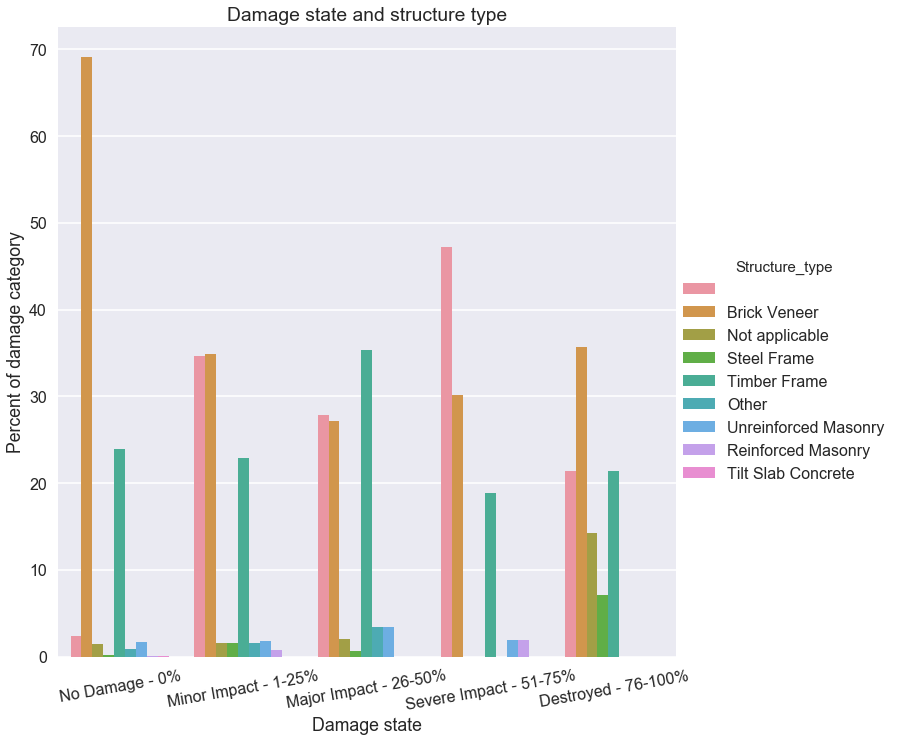

In [22]:
order = ['No Damage - 0%', 'Minor Impact - 1-25%', 'Major Impact - 26-50%', 'Severe Impact - 51-75%', 'Destroyed - 76-100%']
ax = sns.factorplot(x="Damage_state", y = 'Percent', hue="Structure_type", data=structuredamage, order=order, 
                    kind = 'bar', size = 10)
plt.xticks(rotation=10)
plt.title('Damage state and structure type')
plt.ylabel('Percent of damage category')
plt.xlabel('Damage state')

# Can we find wind damage specifically?

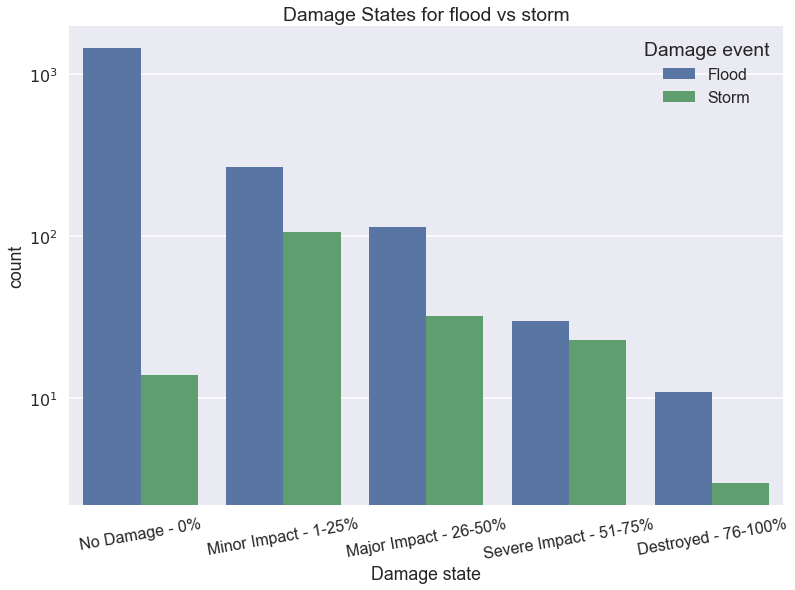

In [23]:
order = ['No Damage - 0%', 'Minor Impact - 1-25%', 'Major Impact - 26-50%', 'Severe Impact - 51-75%', 'Destroyed - 76-100%']
ax = sns.countplot(x="EICU_Degdamage", hue="eventtype", data=df, order=order)
ax.legend(title="Damage event", loc=1)
ax.set_yscale("log", nonposy='clip')
plt.xticks(rotation=10)
plt.title('Damage States for flood vs storm')
plt.xlabel('Damage state')

# <font color=red>Question for follow up with NSWFR</font>

It may be possible to distinguish between flood and storm damage, however it is not clear whether 'flood' damage refers specifically to riverine flooding, or whether water damage from a leaking roof is also classified as flood. 

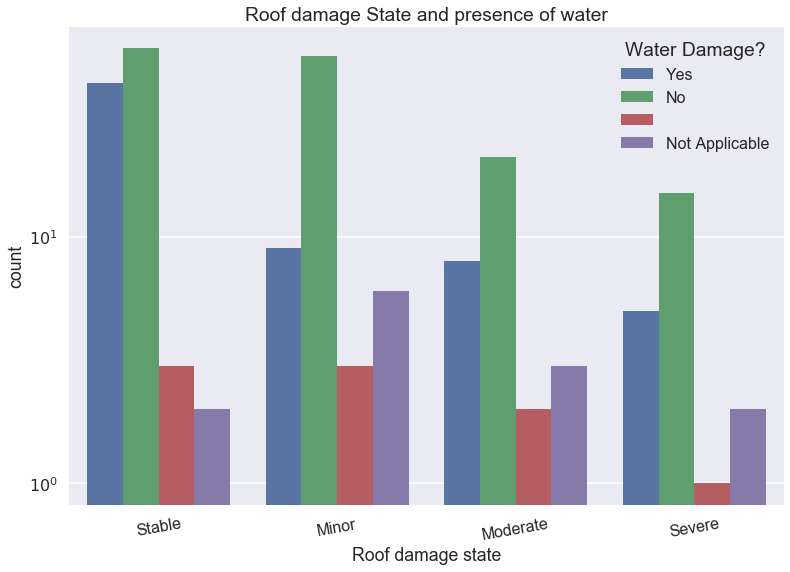

In [24]:
order = ['Stable', 'Minor', 'Moderate', 'Severe']
ax = sns.countplot(x="roofdam", hue="waterinund", data=df, order = order)
ax.legend(title="Water Damage?")
ax.set_yscale("log", nonposy='clip')
plt.xticks(rotation=10)
plt.title('Roof damage State and presence of water')
plt.xlabel('Roof damage state')

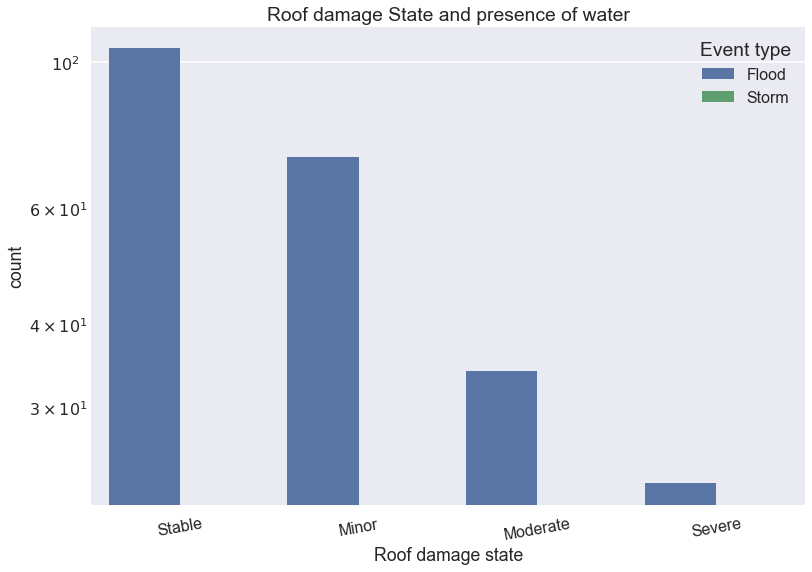

In [25]:
order = ['Stable', 'Minor', 'Moderate', 'Severe']
ax = sns.countplot(x="roofdam", hue="eventtype", data=df, order = order)
ax.legend(title="Event type")
ax.set_yscale("log", nonposy='clip')
plt.xticks(rotation=10)
plt.title('Roof damage State and presence of water')
plt.xlabel('Roof damage state')

No building with roof damage state listed attributes the damage to storm. This suggests that 'flood' is being used to describe any type of water damage, whether it is rising water, or water coming into the house another way. 

This is problematic, as it means it isn't possible to use the 'event type' tag to distinguish between these two scenarios.

## NB
Wind damage doesn't seem to be discernable from this dataset. Roof damage could be used a pseudo-proxy for storm damage, however it is not specifically marked as storm damage in the database. For all of the entries that have roof damage assessed, all of them list the event type as 'flood', not 'storm'. This suggests that water ingress from damaged roofs is classed as flood damage, not storm damage for this event.

# Can we generate a vulnerability-like curve of damage state and modelled wind?

Wind speed was output at each model time step in the ECL event ensemble simulations. These plots use the maximum wind speed over the all time steps for each grid point.

In the first instance, two individual ensemble members (randomly chosen) were interrogated. It was found that these did not differ greatly, and so additional members were not further investigated.

## The model outputs sustained wind speed. We would like to convert this to wind gust.

To do this, we applied a gust conversion factor of 1.6 to see if this improved the results.

In [20]:
df['combined_alltimes_maxwind_stage4_ens12'] = df['combined_alltimes_maxwind_stage4_ens12'] * 1.6
df['combined_alltimes_maxwind_stage4_ens22'] = df['combined_alltimes_maxwind_stage4_ens22'] * 1.6

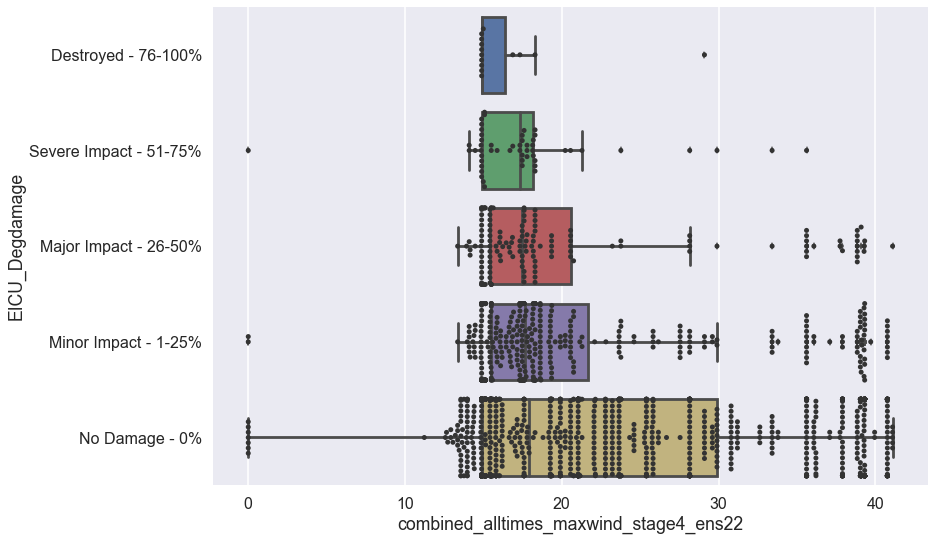

In [21]:
order = ['Destroyed - 76-100%', 'Severe Impact - 51-75%', 'Major Impact - 26-50%', 'Minor Impact - 1-25%', 'No Damage - 0%']
sns.boxplot(y = "EICU_Degdamage", x = "combined_alltimes_maxwind_stage4_ens22", data = df, order = order)
sns.swarmplot(y = "EICU_Degdamage", x = "combined_alltimes_maxwind_stage4_ens22", data = df, order = order, color = "0.2")

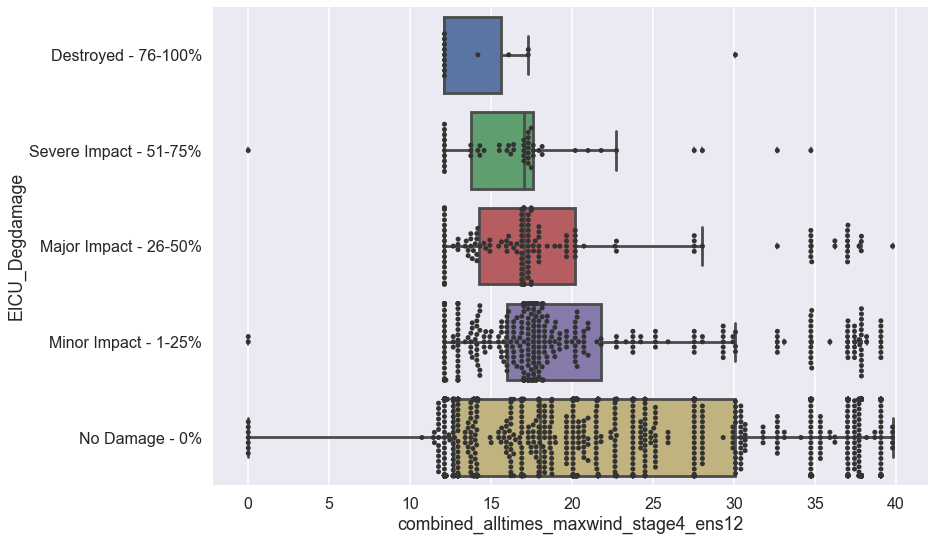

In [22]:
order = ['Destroyed - 76-100%', 'Severe Impact - 51-75%', 'Major Impact - 26-50%', 'Minor Impact - 1-25%', 'No Damage - 0%']
sns.boxplot(y = "EICU_Degdamage", x = "combined_alltimes_maxwind_stage4_ens12", data = df, order = order)
sns.swarmplot(y = "EICU_Degdamage", x = "combined_alltimes_maxwind_stage4_ens12", data = df, order = order, color = "0.2")

When the gust factor is applied, there emerges a threshold-like response to wind speed at around 12 m/s (43 km/hr). The damage relationship however, doesn't increase with increasing wind. The greatest wind speeds are not experienced by the buildings that sustained the greatest damage. 

This suggests that wind may not be the driving factor in generating damage in this event. 

# How about rain?

Is it possible that rain is the factor driving the damage in this event?

The rain rate (kg m-2 s-1) was output for each model time step, and the maximum rain rate throughout the model run was extracted. Again, two random ensemble members were chosen for initial investigation.

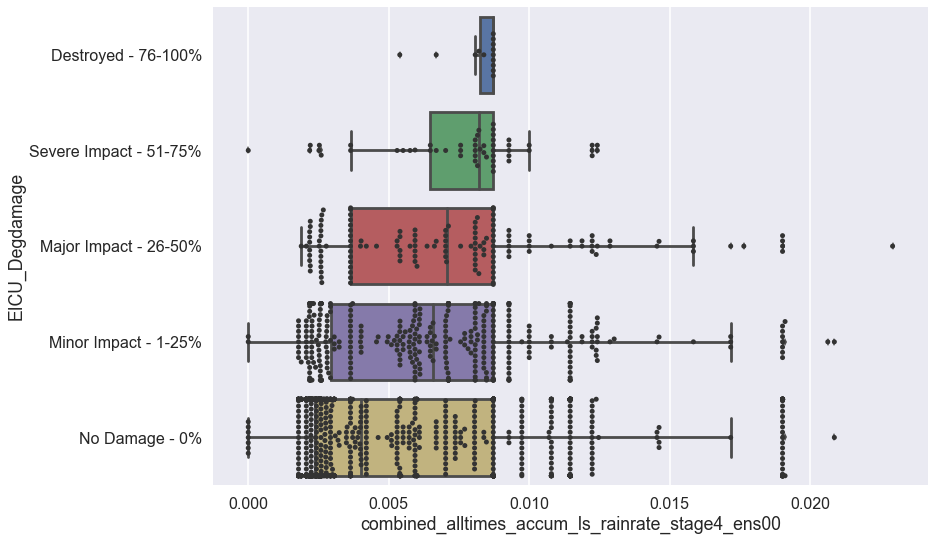

In [28]:
order = ['Destroyed - 76-100%', 'Severe Impact - 51-75%', 'Major Impact - 26-50%', 'Minor Impact - 1-25%', 'No Damage - 0%']
sns.boxplot(y = "EICU_Degdamage", x = "combined_alltimes_accum_ls_rainrate_stage4_ens00", data = df, order = order)
sns.swarmplot(y = "EICU_Degdamage", x = "combined_alltimes_accum_ls_rainrate_stage4_ens00", data = df, order = order, 
              color = "0.2")

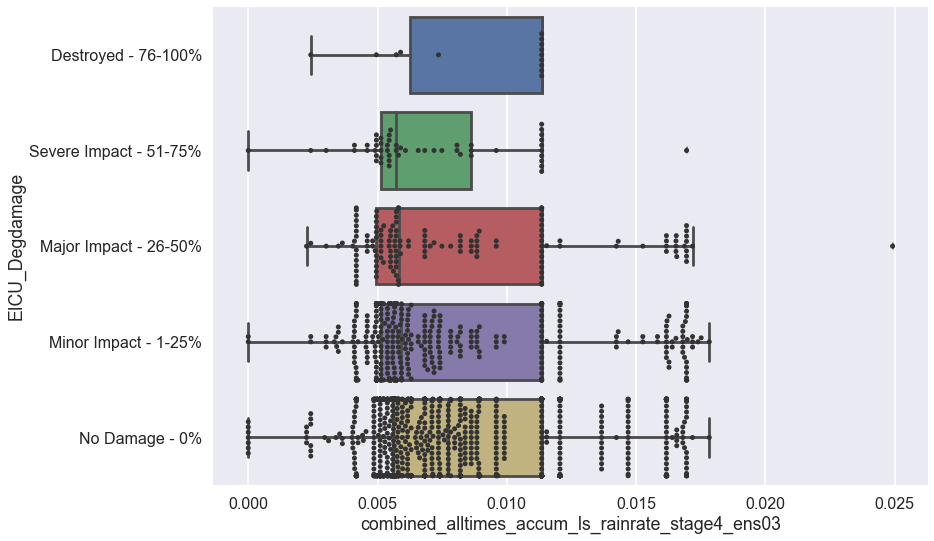

In [29]:
order = ['Destroyed - 76-100%', 'Severe Impact - 51-75%', 'Major Impact - 26-50%', 'Minor Impact - 1-25%', 'No Damage - 0%']
sns.boxplot(y = "EICU_Degdamage", x = "combined_alltimes_accum_ls_rainrate_stage4_ens03", data = df, order = order)
sns.swarmplot(y = "EICU_Degdamage", x = "combined_alltimes_accum_ls_rainrate_stage4_ens03", data = df, order = order, 
              color = "0.2")

The results from the two ensemble members are quite different, suggesting that this variable is much more spatially variable. To address this, we extracted the maximum rain rate for each ensemble member, then calculated the average of those rain rates for each grid box. 

## Ensemble mean rain rate over all time steps

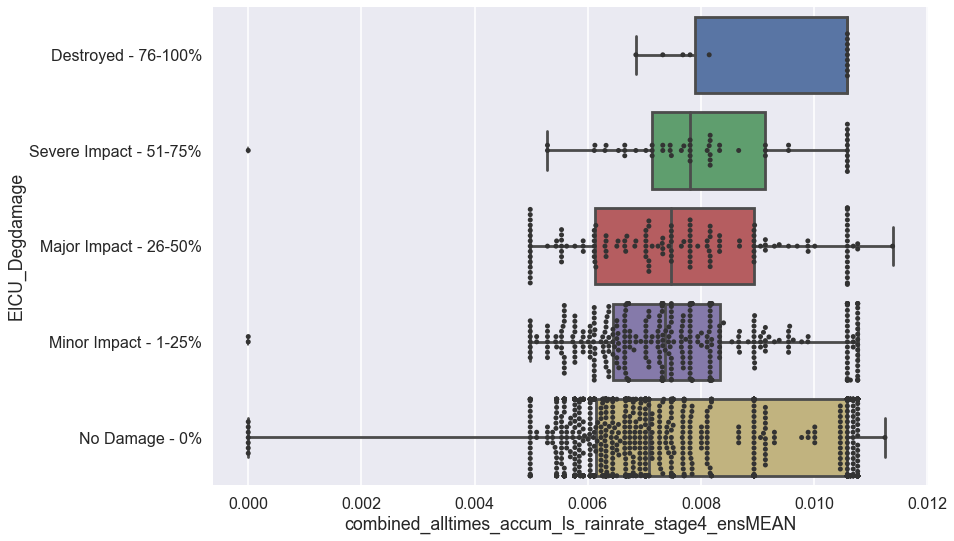

In [5]:
order = ['Destroyed - 76-100%', 'Severe Impact - 51-75%', 'Major Impact - 26-50%', 'Minor Impact - 1-25%', 'No Damage - 0%']
sns.boxplot(y = "EICU_Degdamage", x = "combined_alltimes_accum_ls_rainrate_stage4_ensMEAN", data = df, order = order)
sns.swarmplot(y = "EICU_Degdamage", x = "combined_alltimes_accum_ls_rainrate_stage4_ensMEAN", data = df, order = order, 
              color = "0.2")

## Ensemble standard deviation of rain rate over all ensemble members

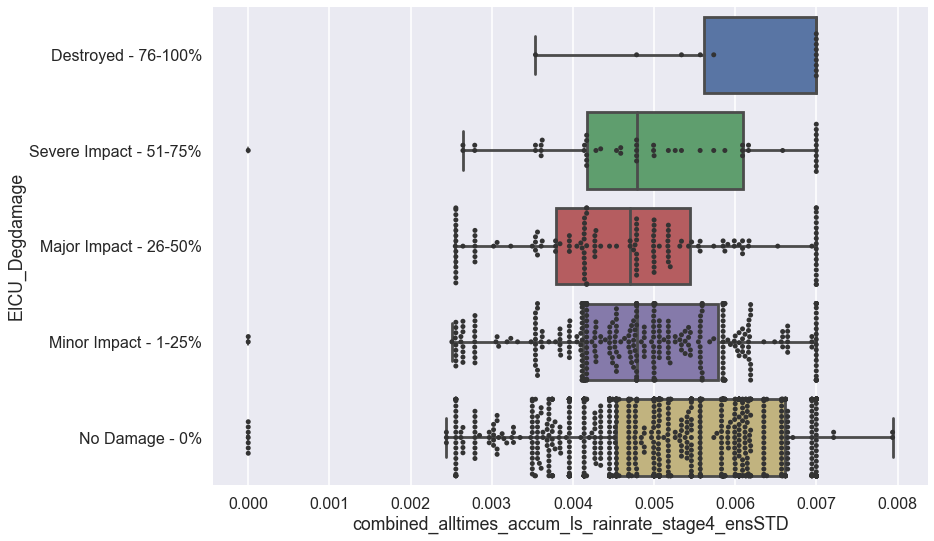

In [7]:
order = ['Destroyed - 76-100%', 'Severe Impact - 51-75%', 'Major Impact - 26-50%', 'Minor Impact - 1-25%', 'No Damage - 0%']
sns.boxplot(y = "EICU_Degdamage", x = "combined_alltimes_accum_ls_rainrate_stage4_ensSTD", data = df, order = order)
sns.swarmplot(y = "EICU_Degdamage", x = "combined_alltimes_accum_ls_rainrate_stage4_ensSTD", data = df, order = order, 
              color = "0.2")

# Results

#### The relationship between damage and rain rate looks much more convincing than with wind. This suggests that it was the rainfall that was the driver of damamge in this event. 

#### This makes sense, as the design wind speed for houses is 38-40 m/s, which is the upper limit of modelled wind speeds for building locations. It is therefore not likely that the wind speed was sufficiently high enough to break apart houses. 

#### The much more logical solution is that the rain rate caused water ingress to houses, either directly through weaknesses in the structure, or through damage to the building's exterior caused by trees falling.

# Can we find any relationship between tree damage and wind speed?

## Locations where 'dangertree' column has been ticked

In [15]:
tree_text = df[df['dangertree'].str.contains('Yes')]
tree_text.shape

(14, 63)

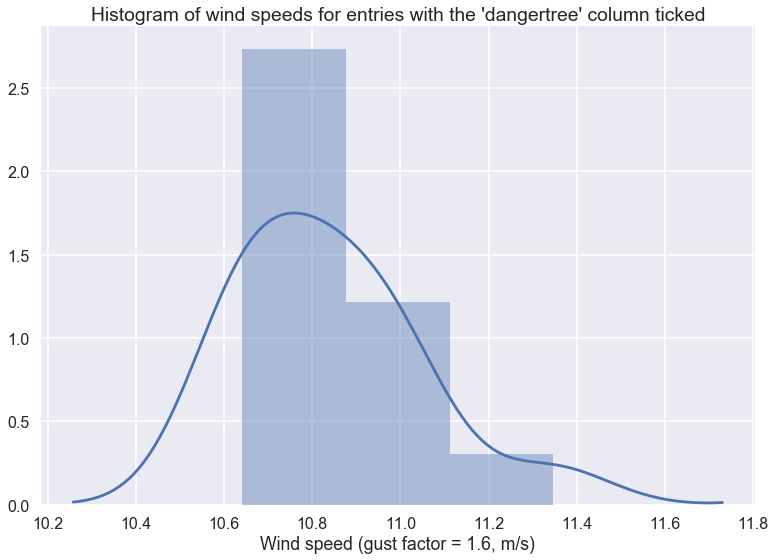

In [16]:
sns.distplot(tree_text.combined_alltimes_maxwind_stage4_ens12)
plt.title('Histogram of wind speeds for entries with the \'dangertree\' column ticked')
plt.xlabel('Wind speed (gust factor = 1.6, m/s)')

## Look for terms relating to tree in the comments field

In [29]:
tree_text = df[df['Comments'].str.contains('tree|branch', case = False)]
tree_text.shape

(176, 63)

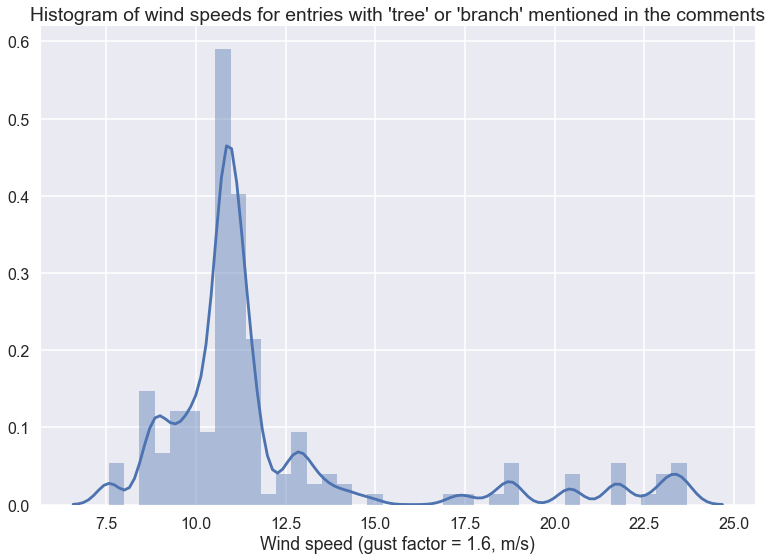

In [26]:
sns.distplot(tree_text.combined_alltimes_maxwind_stage4_ens12)
plt.title('Histogram of wind speeds for entries with \'tree\' or \'branch\' mentioned in the comments')
plt.xlabel('Wind speed (gust factor = 1.6, m/s)')